In [228]:
!pip install imbalanced-learn

  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
ds = pd.read_csv('IPM.csv')
ds

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal
...,...,...,...,...,...
2191,10.13,5522,4.91,65.32,Low
2192,7.11,5440,2.51,65.26,Low
2193,9.79,4761,2.99,64.83,Low
2194,14.99,14922,11.30,70.15,High


In [3]:
ds.isnull().sum()

Harapan_Lama_Sekolah     0
Pengeluaran_Perkapita    0
Rerata_Lama_Sekolah      0
Usia_Harapan_Hidup       0
IPM                      0
dtype: int64

In [4]:
X = ds.drop(columns='IPM')
y = ds.IPM

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=1)
X_train

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
569,13.95,11273,11.14,70.51
502,15.75,13290,11.81,71.06
1041,13.97,7351,10.52,65.47
507,11.63,8034,7.08,60.24
265,13.77,11510,8.04,72.49
...,...,...,...,...
74,15.07,10754,11.63,72.82
538,11.80,4603,5.87,58.00
1700,12.68,12434,10.24,70.47
1060,13.71,7495,8.17,66.10


In [22]:
ds.columns

Index(['Harapan_Lama_Sekolah', 'Pengeluaran_Perkapita', 'Rerata_Lama_Sekolah',
       'Usia_Harapan_Hidup', 'IPM'],
      dtype='object')

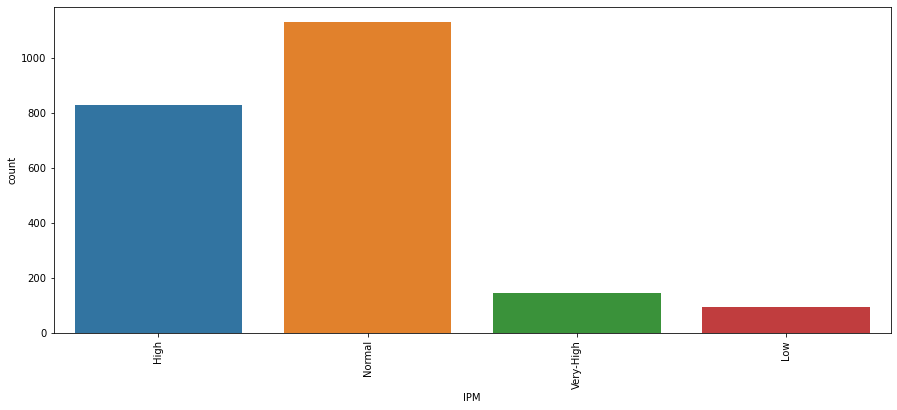

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
sns.countplot(x=ds['IPM'], data = ds)
plt.xticks(rotation=90)
plt.show()

In [6]:
ds.IPM.value_counts()

Normal       1128
High          829
Very-High     146
Low            93
Name: IPM, dtype: int64

In [7]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
# define oversampling strategy
SMOTE = SMOTE()
NR = NearMiss()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

In [8]:
print("Before OverSampling, counts of label 'Low': {}".format(sum(y_train == 'Low')))
print("Before OverSampling, counts of label 'Normal': {}".format(sum(y_train == 'Normal')))
print("Before OverSampling, counts of label 'High': {}".format(sum(y_train == 'High')))
print("Before OverSampling, counts of label 'Very-High': {} \n".format(sum(y_train == 'Very-High')))

print("After OverSampling, counts of label 'Low': {}".format(sum(y_train_SMOTE == 'Low')))
print("After OverSampling, counts of label 'Normal': {}".format(sum(y_train_SMOTE == 'Normal')))
print("After OverSampling, counts of label 'High': {}".format(sum(y_train_SMOTE == 'High')))
print("After OverSampling, counts of label 'Very-High': {}".format(sum(y_train_SMOTE == 'Very-High')))

Before OverSampling, counts of label 'Low': 74
Before OverSampling, counts of label 'Normal': 902
Before OverSampling, counts of label 'High': 663
Before OverSampling, counts of label 'Very-High': 117 

After OverSampling, counts of label 'Low': 902
After OverSampling, counts of label 'Normal': 902
After OverSampling, counts of label 'High': 902
After OverSampling, counts of label 'Very-High': 902


In [9]:
X_train_SMOTE.columns

Index(['Harapan_Lama_Sekolah', 'Pengeluaran_Perkapita', 'Rerata_Lama_Sekolah',
       'Usia_Harapan_Hidup'],
      dtype='object')

# Preprocessing

In [10]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

numpipe = Pipeline([
    ('minmax', MinMaxScaler())
])

numpipe2 = Pipeline([
    ('minmax', MinMaxScaler()),
    ('lida', LDA(n_components=2))
])


from sklearn.compose import ColumnTransformer
prep = ColumnTransformer([
    ('prep', numpipe, ['Harapan_Lama_Sekolah', 'Pengeluaran_Perkapita', 'Rerata_Lama_Sekolah','Usia_Harapan_Hidup'])
])

prep2 = ColumnTransformer([
    ('prep', numpipe2, ['Harapan_Lama_Sekolah', 'Pengeluaran_Perkapita', 'Rerata_Lama_Sekolah','Usia_Harapan_Hidup'])
])

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

final_knn = Pipeline([
    ('prep', prep),
    ('algo_knn', KNeighborsClassifier())
])

final_logistic = Pipeline([
    ('prep', prep),
    ('algo_log', LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000))
])

final_tree = Pipeline([
    ('prep', prep),
    ('algo_tree', DecisionTreeClassifier())
])

final_random = Pipeline([
    ('prep', prep),
    ('algo_rand', RandomForestClassifier()
    )
])

final_ada = Pipeline([
    ('prep', prep),
    ('algo_ada', AdaBoostClassifier(
                    base_estimator=None,
                    n_estimators=100,
                    learning_rate=0.5,
                    algorithm='SAMME.R',
                    random_state=1,
    )
    )
])

final_grad = Pipeline([
    ('prep', prep),
    ('algo_grad', GradientBoostingClassifier())
])

# Finding Best Model

In [11]:
final_knn.fit(X_train_SMOTE, y_train_SMOTE)
train_knn = final_knn.score(X_train_SMOTE, y_train_SMOTE)
score_knn = final_knn.score(X_test, y_test)
print("KNN: ", train_knn)
print("KNN: ", score_knn)

print(" ")

final_logistic.fit(X_train_SMOTE, y_train_SMOTE)
train_logistic = final_logistic.score(X_train_SMOTE, y_train_SMOTE)
score_logistic = final_logistic.score(X_test, y_test)
print("Logistic: ", train_logistic)
print("Logistic: ", score_logistic)

print(" ")

final_tree.fit(X_train_SMOTE, y_train_SMOTE)
train_tree = final_tree.score(X_train_SMOTE, y_train_SMOTE)
score_tree = final_tree.score(X_test, y_test)
print("DecTree: ", train_tree)
print("DecTree: ", score_tree)

print("========================================")

final_random.fit(X_train_SMOTE, y_train_SMOTE)
train_random = final_random.score(X_train_SMOTE, y_train_SMOTE)
score_random = final_random.score(X_test, y_test)
print("RandomForest: ", train_random)
print("RandomForest: ", score_random)

print(" ")

final_ada.fit(X_train_SMOTE, y_train_SMOTE)
train_ada = final_ada.score(X_train_SMOTE, y_train_SMOTE)
score_ada = final_ada.score(X_test, y_test)
print("AdaBoost: ", train_ada)
print("AdaBoost: ", score_ada)

print(" ")

final_grad.fit(X_train_SMOTE, y_train_SMOTE)
train_grad = final_grad.score(X_train_SMOTE, y_train_SMOTE)
score_grad = final_grad.score(X_test, y_test)
print("GradientBoost: ", train_grad)
print("GradientBoost: ", score_grad)

KNN:  0.9880820399113082
KNN:  0.9590909090909091
 
Logistic:  0.8475609756097561
Logistic:  0.7477272727272727
 
DecTree:  1.0
DecTree:  0.9454545454545454
RandomForest:  1.0
RandomForest:  0.9727272727272728
 
AdaBoost:  0.655210643015521
AdaBoost:  0.8931818181818182
 
GradientBoost:  1.0
GradientBoost:  0.9772727272727273


# Tuning

In [378]:
ds

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal
...,...,...,...,...,...
2191,10.13,5522,4.91,65.32,Low
2192,7.11,5440,2.51,65.26,Low
2193,9.79,4761,2.99,64.83,Low
2194,14.99,14922,11.30,70.15,High


# Tuning KNN

In [1]:
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

In [2]:
gsp.rf_params

{'algo__n_estimators': [100, 150, 200],
 'algo__max_depth': [20, 50, 80],
 'algo__max_features': [0.3, 0.6, 0.8],
 'algo__min_samples_leaf': [1, 5, 10]}

In [389]:
parameter = {
    'algo_knn__n_neighbors' : range(1,51,2),
    'algo_knn__weights' : ['uniform', 'distance'],
    'algo_knn__p': [1,2]
}

for i in range (2,12):
    model = GridSearchCV(final_knn, parameter, n_jobs=-1, verbose=1, cv=i)
    model.fit(X_train_SMOTE, y_train_SMOTE)
    print(model.best_params_)
    print(model.score(X_train_SMOTE, y_train_SMOTE), model.best_score_, model.score(X_test, y_test))
    print("")

Fitting 2 folds for each of 100 candidates, totalling 200 fits
{'algo_knn__n_neighbors': 1, 'algo_knn__p': 2, 'algo_knn__weights': 'uniform'}
1.0 0.9819844789356984 0.9636363636363636

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'algo_knn__n_neighbors': 9, 'algo_knn__p': 2, 'algo_knn__weights': 'distance'}
1.0 0.9828179597226199 0.9727272727272728

Fitting 4 folds for each of 100 candidates, totalling 400 fits
{'algo_knn__n_neighbors': 9, 'algo_knn__p': 2, 'algo_knn__weights': 'distance'}
1.0 0.9858647450110865 0.9727272727272728

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'algo_knn__n_neighbors': 9, 'algo_knn__p': 2, 'algo_knn__weights': 'distance'}
1.0 0.9853116439540344 0.9727272727272728

Fitting 6 folds for each of 100 candidates, totalling 600 fits
{'algo_knn__n_neighbors': 9, 'algo_knn__p': 2, 'algo_knn__weights': 'distance'}
1.0 0.9850360141734983 0.9727272727272728

Fitting 7 folds for each of 100 candidates, totalling 700 fits
{'algo_k

In [12]:
final_knn2 = Pipeline([
    ('prep', prep), # -> coba ubah prep2
    ('algo_knn', KNeighborsClassifier( 
                    n_neighbors=5,
                    weights='uniform',
                    algorithm='auto',
                    leaf_size=30,
                    p=2,
                    metric='minkowski',
                    metric_params=None,
                    n_jobs=None)
    )
])

In [13]:
final_knn2.fit(X_train_SMOTE, y_train_SMOTE)
train_knn2 = final_knn2.score(X_train_SMOTE, y_train_SMOTE)
score_knn2 = final_knn2.score(X_test, y_test)
print("KNN Train: ", train_knn2)
print("KNN Test: ", score_knn2)

KNN Train:  0.9880820399113082
KNN Test:  0.9590909090909091


In [14]:
#Check performa model menggunakan classification_report
from sklearn.metrics import classification_report
y_pred_knn = final_knn2.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

        High       0.94      0.96      0.95       166
         Low       0.95      1.00      0.97        19
      Normal       0.98      0.95      0.96       226
   Very-High       0.97      1.00      0.98        29

    accuracy                           0.96       440
   macro avg       0.96      0.98      0.97       440
weighted avg       0.96      0.96      0.96       440



In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = round(precision_score(y_test, y_pred_knn, average='micro'), 2)
recall = round(recall_score(y_test, y_pred_knn, average='micro'), 2)
accuracy = round(accuracy_score(y_test, y_pred_knn), 2)
f1 = round(f1_score(y_test, y_pred_knn, average='micro'), 2)

precision,recall,accuracy,f1

(0.96, 0.96, 0.96, 0.96)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

accuracy_score(y_test, y_pred_knn)

[[160   0   5   1]
 [  0  19   0   0]
 [ 11   1 214   0]
 [  0   0   0  29]]


0.9590909090909091

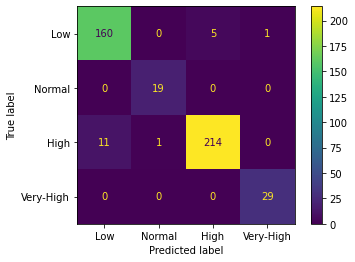

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Low', 'Normal', 'High', 'Very-High'])

cm_display.plot()
plt.show()

# Predict

In [30]:
test_data = []
dt = []

hls = float(input('Masukan harapan lama sekolah: '))
pp = float(input('Masukan pengeluaran perkapita: '))
rls = float(input('Masukan rerata lama sekola: '))
uhh = float(input('Masukan usia harapan hidup: '))

dt.append(hls)
dt.append(pp)
dt.append(rls)
dt.append(uhh)

test_data.append(dt)
# test_data

X_pred = pd.DataFrame(test_data, index=[''], columns=X.columns)
X_pred['IPM'] = final_knn2.predict(X_pred)
print(X_pred)

Masukan harapan lama sekolah: 13
Masukan pengeluaran perkapita: 20000
Masukan rerata lama sekola: 9
Masukan usia harapan hidup: 75
  Harapan_Lama_Sekolah  Pengeluaran_Perkapita  Rerata_Lama_Sekolah  \
                  13.0                20000.0                  9.0   

  Usia_Harapan_Hidup        IPM  
                75.0  Very-High  


# Save Model

In [20]:
import joblib

In [21]:
# save
joblib_file = 'model.pkl'
joblib.dump(final_knn2, joblib_file)

['model.pkl']